# **RESIDÊNCIAS EM VISÃO COMPUTACIONAL E ENGENHARIA E CIÊNCIA DE DADOS**

# **Introdução à Ciência de Dados**

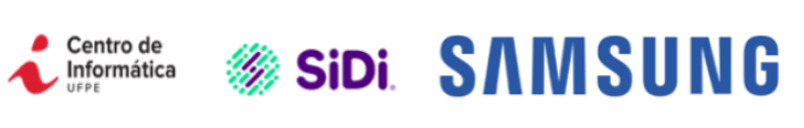

# Exercícios #2

As atividades neste notebook buscam colocar em prática os conceitos relacionados à análise descritivas dos dados, derivação de features, normalização de dados, visualização de dados, compreensão e aplicação de libraries.

Uma base de dados de trajetórias de ônibus da cidade de Dublin será utilizada para este exercício. 

A base possui 5 features: rota, trajetoria_id, instante, latitude e longitude.

> route: identificação da rota
>
> trajectory_id: id da trajetória
>
> instant: timestamp de registro de cada ponto da trajetória
>
> latitude e longitude: coordenadas do ponto de registro


### 1. Carregue as bibliotecas necessárias e o dataset de trabalho
**DICA**: Além da biblioteca Pandas, faça a importação das funções *haversine* e *Unit* da biblioteca ***haversine***

OBS: Talvez seja preciso instalar o pacote ***haversine*** utilizando o comando abaixo:
> ! pip install haversine

In [ ]:
# Instale o pacote haversine aqui

In [ ]:
# Carregue as bibliotecas aqui

#### Dataset de Trabalho
https://cin.ufpe.br/~moc/dublin_trajectories.csv

In [ ]:
# Carregue o dataset de trabalho aqui

### 2. Converta os dados para os tipos correspondentes

In [ ]:
# Visualize os tipos de dados colunares aqui

In [ ]:
# Faça a conversão dos tipos aqui

### 3. Monte as trajetórias
**DICAS**: 
> 1. As trajetórias devem ter o mesmo *trajectory_id* e estarem ordenadas por *instante*
> 2. Primeiro agrupe pela trajetória
> 3. Não retorne o id da trajetória (label do grupo) como index do dataframe
> 4. Para visualizar o dataframe agrupado, realize alguma operação sobre as linhas agrupadas, como por exemplo a contagem de linhas pertencentes a cada grupo.
> 5. Ordene os valores pelo *instante*


In [ ]:
# [Agrupe as trajetórias aqui]

In [ ]:
# [Remova o label do grupo do índice do dataframe]

In [ ]:
# [Realize alguma operação sobre os conjuntos agrupados]

In [ ]:
# [Faça a ordenação pela coluna instant]

### 4. Identifique quantas rotas existem no dataset
DICA: Utilize o dataframe de trajetórias montado anteriormente

In [ ]:
# Identifique as rotas aqui

### 5. Identifique quantas trajetórias existem por rotas.
**DICA**: Agrupe as trajetórias por rota e conte

In [ ]:
# [Identifique as trajetórias por rotas aqui]

### 6. Obtenha a média, o desvio padrão, os valores mínimo e máximo de pontos por trajetórias
**DICAS**:
> 1. Faça um novo agrupamento por trajetória
> 2. Faça novamente a contagem de pontos por trajetória, dessa vez selecionando apenas a coluna *instant*
> 3. Renomeie a coluna *instant* para *count_points*
> 4. Apresente a média, desvio padrão, número máximo e mínimo de pontos por trajetória.
>> 4.1 Utilize a função de agregação para exibir todos esses valores em uma única saída. 
>>
>> OBS: Consulte a função [.agg()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html).

In [ ]:
# [Faça um novo agrupamento por trajetória aqui. Atribua esse agrupamento a uma nova variável.]

In [ ]:
# [Faça a contagem dos pontos da trajetória, mas selecione apenas a coluna instant. 
# O dataframe ser exibido conforme o exemplo abaixo.]

**EXEMPLO DE SAÍDA**

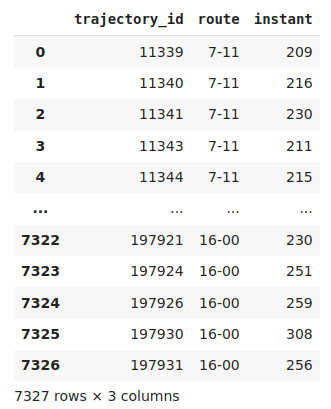

In [ ]:
# [AQUI RENOMEIE A COLUNA "instant" PARA "count_points"]

In [ ]:
# [AQUI FAÇA A EXIBIÇÃO DOS VALORES DE MÉDIA, DESVIO PADRÃO, MÁXIMO E MÍNIMO DE PONTOS POR TRAJETÓRIA]

### 7. Quais rotas possuem as trajetórias mais rápidas?

#### 7.1 Calcule a velocidade e a distância de cada ponto da trajetória.
**DICAS**:
> 1. Formate o dataset de forma adequada:
>> 1.1 Ordene o dataset pelas colunas *trajectory_id* e *instant*
>>
>> 1.2 Utilizando o dataframe ordenado, faça um "shift" nos dados. 
>>
>> **OBS**: para isso adicione colunas auxiliares ao dataframe.
>>
>> Consulte a função [.shift()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)
>> 
>> O dataframe de resultado deverá ser igual ao exemplo abaixo.

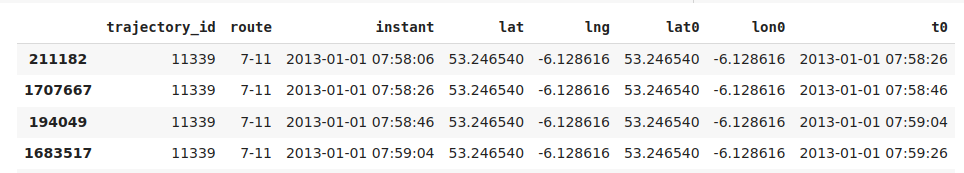

In [ ]:
# [FAÇA A ORDENAÇÃO AQUI]

In [ ]:
# [FAÇA O SHIFT AQUI]

##### 7.1. Continue...
> 2. Remova as linhas que possuam valores faltantes
>
> 3. Compute a distância em metros utilizando a função haversine. Utilize o objeto *Unit* para selecionar a unidade **METERS**.
>> 3.1. Passe como parâmetros do método latitude e longitude do ponto atual e a latitude e longitude do próximo ponto.
>>
>> 3.2 Utilize a função [.apply()](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html?highlight=apply#pandas.core.groupby.GroupBy.apply) para atribuir a distância calculada à respectiva linha do dataframe, em uma nova coluna chamada *dist_m*.

In [ ]:
# [REMOVA AS LINHAS QUE POSSUEM VALORES FALTANTES]

In [ ]:
# [AQUI FAÇA A APLICAÇÃO DA FUNÇÃO haversine PARA CÁLCULO DA DISTÂNCIA]

##### 7.1 Continue...
> 4. Utilize a função definida abaixo para calcular a velocidade dos pontos em metros por segundo.
>> **OBS**: Seguindo o passo anterior para cálculo da distância entre os pontos, utilize a função [.apply()](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html?highlight=apply#pandas.core.groupby.GroupBy.apply)


In [ ]:
def calc_velocity(dist_m, time_start, time_end):
    """Return 0 if time_start == time_end, avoid dividing by 0"""
    return dist_m / (time_end - time_start).seconds if time_end > time_start else 0

In [ ]:
# [AQUI FAÇA A APLICAÇÃO DA FUNÇÃO calc_velocity PARA CÁLCULO DA VELOCIDADE ENTRE OS PONTOS]

#### 7.2 Identifique as trajetórias mais rápidas

In [ ]:
# [IDENTIFIQUE AQUI AS TRAJETÓRIAS MAIS RÁPIDAS]

### 8. Existe correlação entre a velocidade média e o tamanho da trajetória?
> 1. Primeiro agrupe os dados pelas colunas trajectory_id e route
> 2. Agora, faça uma agregação criando uma nova coluna (mean_vel) usando a média a partir da coluna volocity_mps e outra coluna chamada sum_dist usando a soma da coluna dist_m.
> 3. Por último, calcule a correlação de pearson implementado pelo pandas

O dataframe final deve ser igual a:

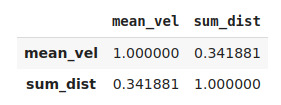



In [ ]:
# [AQUI REALIZE O AGRUPAMENTO]

In [ ]:
# [REALIZE A AGREGAÇÃO]

In [ ]:
# [VISUALIZE O DATAFRAME FINAL]

In [ ]:
# [CALCULE A CORRELAÇÃO AQUI]

### 9. Qual a distribuição de velocidade das trajetórias por rotas? São normais? Plote o Histograma da velocidade.
> 1. Primeiro agrupe os dados pelas colunas trajectory_id e route
> 2. Em seguida, realize uma agregação criando uma nova coluna (vel_final) que conterá a média das velocidades por trajetória.
> 3. O dataframe final deve conter duas colunas: route e vel_final
> 4. Plote o histograma do dataframe final
> 5. Mostre por meio de algum plot a média, mediana e o intervalo interquartil

O dataframe final deve ser igual a:

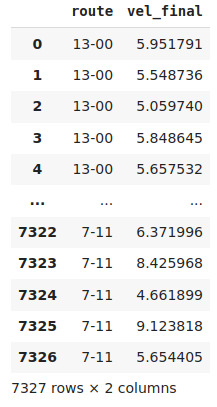

In [ ]:
# [AQUI REALIZE O AGRUPAMENTO]

In [ ]:
# [REALIZE A AGREGAÇÃO]

In [ ]:
# [VISUALIZE O DATAFRAME FINAL]

In [ ]:
# [PLOT O HISTOGRAMA]

In [ ]:
# [PLOT A MÉDIA, MEDIANA E O INTERVALO INTERQUARTIL]

## EXERCÍCIOS ADICIONAIS

### 10. Mostre a média, desvio, mínimo, máximo, mediana das velocidades médias por turno e por rotas (dia, tarde e noite).

### 11. Plotar trajetórias por rotas

### 12. Quais rotas cujas trajetórias possuem mais pontos de paradas (velocidade zero)? Em qual(is) turnos (manhã, tarde, noite) há mais paradas?

### 13. Considerando que as velocidades seguem uma fdp normal padrão. Quais trajetórias por rotas possuem velocidades médias consideradas outliers?